# PRCP- 1001- RiceLeaf disease detection

## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that


### Load Libraries

In [2]:
#Import Basic Libaries
import pandas as pd
import numpy as np
import keras 
import tensorflow as tf
#Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#cnn architecture
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.models import Sequential
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping
#warnings
import warnings
warnings.filterwarnings('ignore')


### Setting Enviornment

In [4]:
input_shape_2D=(224,224)
input_shape_3D= (224,224,3)
seed=1
batch_size=32
epochs=30
stopper=EarlyStopping(patience=5)

### Load Data

In [5]:
#loading image data
data_ds= tf.keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\ansrv\OneDrive\Desktop\naju\Rice_leaf_data",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=None,
    image_size=input_shape_2D,
    
)

Found 119 files belonging to 3 classes.


In [6]:
print('class names:',data_ds.class_names)

class names: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [7]:

def show_images(images, labels):
    fig, axes = plt.subplots(4, 8, figsize=(10, 10))
    axes = axes.flatten()
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[i].imshow(img.numpy().astype("uint8"))
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

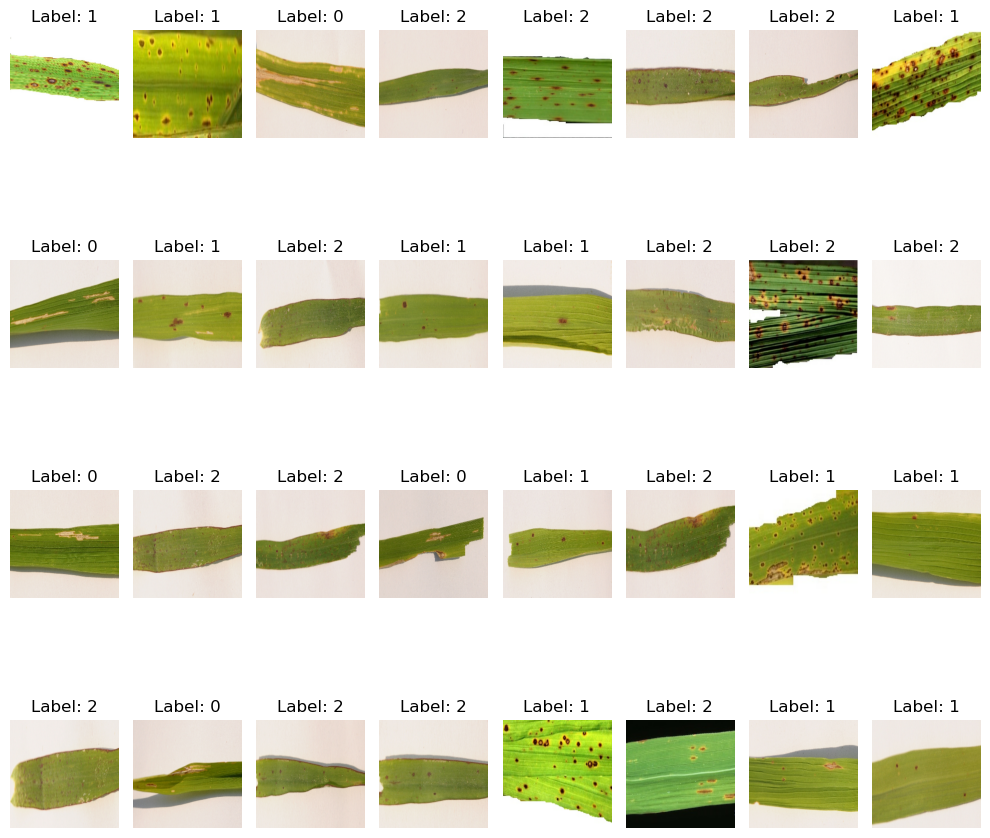

In [8]:
#displaying image batch of 24
batched_ds = data_ds.batch(batch_size)

batch = next(iter(batched_ds))
images, labels = batch

images, labels = next(iter(batched_ds))
show_images(images, labels)

### Data Preprocessing

In [9]:

X=[]
y= []

for image, label in data_ds.batch(119):
  for img, lab in zip(image, label):
    X.append(img)
    y.append(lab.numpy())

In [10]:
# converting to numpy array
X= np.array(X)
y= np.array(y)

In [11]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [12]:
X_train.shape

(89, 224, 224, 3)

In [13]:
X_train = X_train.astype('float32')/255 #scaling
X_test = X_test.astype('float32')/255

In [14]:
num_classes = len(np.unique(y_train))
num_classes

3

In [15]:
#Encoding
y_train = to_categorical(y_train, num_classes=len(data_ds.class_names))
y_test = to_categorical(y_test, num_classes=len(data_ds.class_names))

### CNN Model Implementation

In [16]:
own_model=Sequential()

# adding first convloutional layer
own_model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape_3D))
own_model.add(MaxPooling2D())

# adding second convloutional layer
own_model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
own_model.add(MaxPooling2D())

# adding third convloutional layer
own_model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
own_model.add(MaxPooling2D())

# adding flatten layer
own_model.add(Flatten())

# adding fully connected layers
own_model.add(Dense(200, activation='relu'))

#adding output layer : number of classes are 3
own_model.add(Dense(3, activation='softmax'))


In [17]:
# compiling model
own_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
#training model
from keras.callbacks import ModelCheckpoint
checkpointer_own = ModelCheckpoint(filepath='own_model.weights.best.hdf5', verbose=3, save_best_only=True)

history=own_model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=epochs, callbacks=[checkpointer_own, stopper])

Epoch 1/30


3/3 [==============================] - ETA: 0s - loss: 3.5995 - accuracy: 0.3034
Epoch 1: val_loss improved from inf to 1.80797, saving model to own_model.weights.best.hdf5
3/3 [==============================] - 6s 931ms/step - loss: 3.5995 - accuracy: 0.3034 - val_loss: 1.8080 - val_accuracy: 0.2667
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 1.6171 - accuracy: 0.4494
Epoch 2: val_loss improved from 1.80797 to 1.19222, saving model to own_model.weights.best.hdf5
3/3 [==============================] - 2s 859ms/step - loss: 1.6171 - accuracy: 0.4494 - val_loss: 1.1922 - val_accuracy: 0.4000
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 1.1861 - accuracy: 0.3596
Epoch 3: val_loss improved from 1.19222 to 1.09049, saving model to own_model.weights.best.hdf5
3/3 [==============================] - 2s 786ms/step - loss: 1.1861 - accuracy: 0.3596 - val_loss: 1.0905 - val_accuracy: 0.3667
Epoch 4/30
3/3 [==============================] - E

In [19]:
# Evaluate the model
test_loss, test_acc = own_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

1/1 [==============================] - 0s 179ms/step - loss: 1.0031 - accuracy: 0.5667
Test Accuracy: 0.5666666626930237


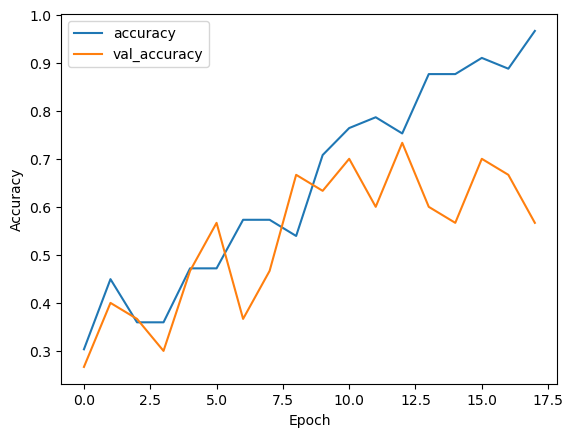

In [20]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Data Augmentation

In [21]:
datagen = ImageDataGenerator(
     rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True)

In [22]:
#training model
checkpointer_own_aug = ModelCheckpoint(filepath='own_model_aug.weights.best.hdf5', verbose=3, save_best_only=True)
#Load data
#datagen.fit(X_train)
aug_history= own_model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size, 
    epochs=epochs,
    callbacks=[stopper, checkpointer_own_aug]
)

Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 2.9115 - accuracy: 0.4375
Epoch 1: val_loss improved from inf to 0.64309, saving model to own_model_aug.weights.best.hdf5
2/2 [==============================] - 4s 2s/step - loss: 2.9115 - accuracy: 0.4375 - val_loss: 0.6431 - val_accuracy: 0.6333
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 1.2400 - accuracy: 0.4561
Epoch 2: val_loss did not improve from 0.64309
2/2 [==============================] - 3s 1s/step - loss: 1.2400 - accuracy: 0.4561 - val_loss: 0.8121 - val_accuracy: 0.6333
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 1.2362 - accuracy: 0.4035
Epoch 3: val_loss did not improve from 0.64309
2/2 [==============================] - 2s 1s/step - loss: 1.2362 - accuracy: 0.4035 - val_loss: 0.9400 - val_accuracy: 0.5667
Epoch 4/30
2/2 [==============================] - ETA: 0s - loss: 1.2120 - accuracy: 0.4211
Epoch 4: val_loss did not improve from 0.64309
2/2 [============

In [23]:
# Evaluate the model
test_loss, test_acc = own_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

1/1 [==============================] - 0s 199ms/step - loss: 1.0481 - accuracy: 0.3667
Test Accuracy: 0.36666667461395264


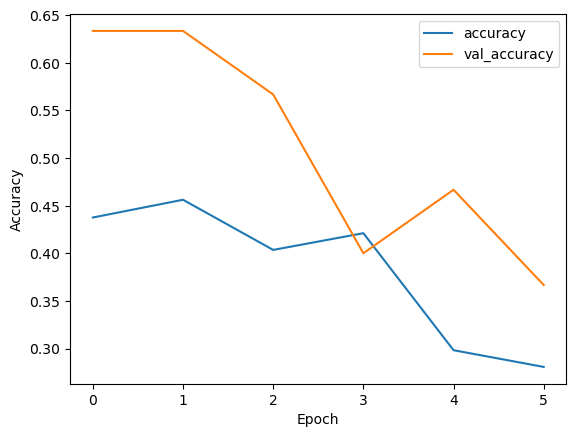

In [24]:
# Plot training history
plt.plot(aug_history.history['accuracy'], label='accuracy')
plt.plot(aug_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Transfer Learning Model

In [25]:
#VGG16
vgg16_model=Sequential()
pretrained_model=tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=3,
    classifier_activation='softmax'
)
for layer in pretrained_model.layers:
    layer.trainable=False
    
vgg16_model.add(pretrained_model)
vgg16_model.add(Flatten())  
vgg16_model.add(Dense(512,activation='relu'))
#vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(3,activation='softmax'))

# compiling model
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
#training model without aug
checkpointer_vgg16= ModelCheckpoint(filepath='vgg16.weights.best.hdf5', verbose=3, save_best_only=True)

vgg16_history= vgg16_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    callbacks=[stopper, checkpointer_vgg16]
)

Epoch 1/30
3/3 [==============================] - ETA: 0s - loss: 9.9636 - accuracy: 0.3820
Epoch 1: val_loss improved from inf to 7.92858, saving model to inception.weights.best.hdf5
3/3 [==============================] - 31s 10s/step - loss: 9.9636 - accuracy: 0.3820 - val_loss: 7.9286 - val_accuracy: 0.3333
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 3.9083 - accuracy: 0.4944
Epoch 2: val_loss improved from 7.92858 to 3.51359, saving model to inception.weights.best.hdf5
3/3 [==============================] - 27s 10s/step - loss: 3.9083 - accuracy: 0.4944 - val_loss: 3.5136 - val_accuracy: 0.5667
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 2.6238 - accuracy: 0.5955
Epoch 3: val_loss improved from 3.51359 to 1.87456, saving model to inception.weights.best.hdf5
3/3 [==============================] - 27s 10s/step - loss: 2.6238 - accuracy: 0.5955 - val_loss: 1.8746 - val_accuracy: 0.4000
Epoch 4/30
3/3 [==============================] - ETA: 0

In [27]:
# Evaluate the model
test_loss, test_acc = vgg16_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

1/1 [==============================] - 6s 6s/step - loss: 0.5780 - accuracy: 0.8000
Test Accuracy: 0.800000011920929


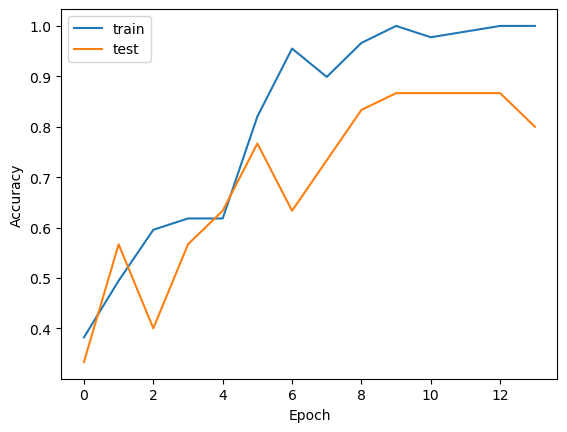

In [28]:
# Plot training history
plt.plot(vgg16_history.history['accuracy'], label='train')
plt.plot(vgg16_history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
#model training with augmentation
checkpointer_vgg16_aug= ModelCheckpoint(filepath='vgg16_aug.weights.best.hdf5', verbose=3, save_best_only=True)

vgg16_history_aug= vgg16_model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs,
    callbacks=[stopper, checkpointer_vgg16]
)

Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 1.4535 - accuracy: 0.4844
Epoch 1: val_loss improved from 0.53815 to 0.51807, saving model to inception.weights.best.hdf5
2/2 [==============================] - 24s 15s/step - loss: 1.4535 - accuracy: 0.4844 - val_loss: 0.5181 - val_accuracy: 0.8333
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 0.8758 - accuracy: 0.6491
Epoch 2: val_loss did not improve from 0.51807
2/2 [==============================] - 20s 12s/step - loss: 0.8758 - accuracy: 0.6491 - val_loss: 0.7130 - val_accuracy: 0.8000
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 0.7781 - accuracy: 0.7018
Epoch 3: val_loss improved from 0.51807 to 0.51399, saving model to inception.weights.best.hdf5
2/2 [==============================] - 21s 13s/step - loss: 0.7781 - accuracy: 0.7018 - val_loss: 0.5140 - val_accuracy: 0.8667
Epoch 4/30
2/2 [==============================] - ETA: 0s - loss: 0.6185 - accuracy: 0.7018
Epoch 4: 

In [30]:
# Evaluate the model
test_loss, test_acc = vgg16_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

1/1 [==============================] - 6s 6s/step - loss: 0.4128 - accuracy: 0.9000
Test Accuracy: 0.8999999761581421


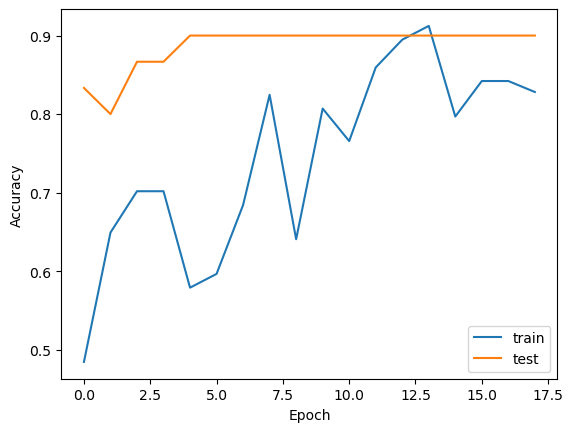

In [31]:
# Plot training history
plt.plot(vgg16_history_aug.history['accuracy'], label='train')
plt.plot(vgg16_history_aug.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
#inception model
inception_base=keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape_3D,
    pooling=None,
    classes=3,
    classifier_activation="softmax",
)

for layer in inception_base.layers:
    layer.trainable=False


 # building fully connected layers
inception_model= Sequential()

inception_model.add(inception_base)
inception_model.add(Flatten())

inception_model.add(Dense(128, activation='relu'))
inception_model.add(Dense(3, activation='softmax'))


#compiling 
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

In [33]:
#training model without augmentation
checkpointer_inception = ModelCheckpoint(filepath='inception.weights.best.hdf5', verbose=3, save_best_only=True)

inception_history= inception_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    callbacks=[stopper, checkpointer_inception]
)

Epoch 1/30
3/3 [==============================] - ETA: 0s - loss: 47.5086 - accuracy: 0.3258
Epoch 1: val_loss improved from inf to 53.85026, saving model to inception.weights.best.hdf5
3/3 [==============================] - 26s 7s/step - loss: 47.5086 - accuracy: 0.3258 - val_loss: 53.8503 - val_accuracy: 0.2667
Epoch 2/30
3/3 [==============================] - ETA: 0s - loss: 20.8291 - accuracy: 0.5281
Epoch 2: val_loss improved from 53.85026 to 9.95582, saving model to inception.weights.best.hdf5
3/3 [==============================] - 7s 3s/step - loss: 20.8291 - accuracy: 0.5281 - val_loss: 9.9558 - val_accuracy: 0.6000
Epoch 3/30
3/3 [==============================] - ETA: 0s - loss: 10.5271 - accuracy: 0.6067
Epoch 3: val_loss improved from 9.95582 to 8.07201, saving model to inception.weights.best.hdf5
3/3 [==============================] - 7s 3s/step - loss: 10.5271 - accuracy: 0.6067 - val_loss: 8.0720 - val_accuracy: 0.7000
Epoch 4/30
3/3 [==============================] - ET

In [34]:
# Evaluate the model
test_loss, test_acc = inception_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

1/1 [==============================] - 1s 1s/step - loss: 0.9513 - accuracy: 0.8000
Test Accuracy: 0.800000011920929


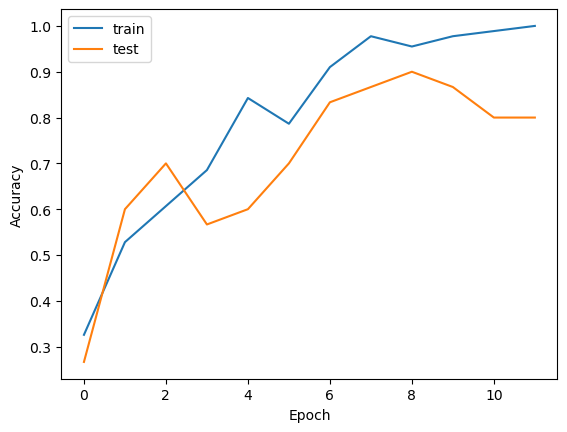

In [35]:
# Plot training history
plt.plot(inception_history.history['accuracy'], label='train')
plt.plot(inception_history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
#training model
checkpointer_inception_aug = ModelCheckpoint(filepath='inception_aug.weights.best.hdf5', verbose=3, save_best_only=True)

inception_history_aug= inception_model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs,
    callbacks=[stopper, checkpointer_inception_aug]
)

Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 3.9377 - accuracy: 0.6562
Epoch 1: val_loss improved from inf to 0.65031, saving model to inception_aug.weights.best.hdf5
2/2 [==============================] - 13s 4s/step - loss: 3.9377 - accuracy: 0.6562 - val_loss: 0.6503 - val_accuracy: 0.8333
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 1.2755 - accuracy: 0.8421
Epoch 2: val_loss improved from 0.65031 to 0.38629, saving model to inception_aug.weights.best.hdf5
2/2 [==============================] - 7s 4s/step - loss: 1.2755 - accuracy: 0.8421 - val_loss: 0.3863 - val_accuracy: 0.9000
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 1.7628 - accuracy: 0.7368
Epoch 3: val_loss did not improve from 0.38629
2/2 [==============================] - 5s 3s/step - loss: 1.7628 - accuracy: 0.7368 - val_loss: 0.4242 - val_accuracy: 0.9000
Epoch 4/30
2/2 [==============================] - ETA: 0s - loss: 2.0727 - accuracy: 0.7188
Epoch 4: v

In [37]:
# Evaluate the model
test_loss, test_acc = inception_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

1/1 [==============================] - 1s 1s/step - loss: 0.3977 - accuracy: 0.8667
Test Accuracy: 0.8666666746139526


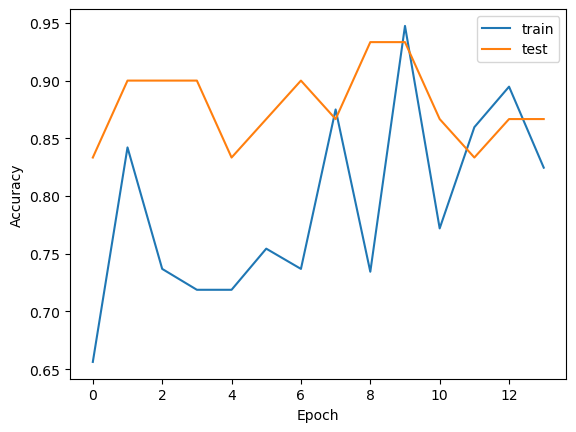

In [38]:
# Plot training history
plt.plot(inception_history_aug.history['accuracy'], label='train')
plt.plot(inception_history_aug.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model Comparison

By comparing above models,Its clear that the transfer-learning models like inception and vgg16 have almost same score.here we choose inception model as best model with accuracy 86 percentage.

### Model Prediction

In [40]:
#Loading best model
inception_model.load_weights('inception_aug.weights.best.hdf5')

In [41]:
# get predictions on the test set
y_hat = inception_model.predict(X_test)

# define text labels
labels = data_ds.class_names

1/1 [==============================] - 5s 5s/step


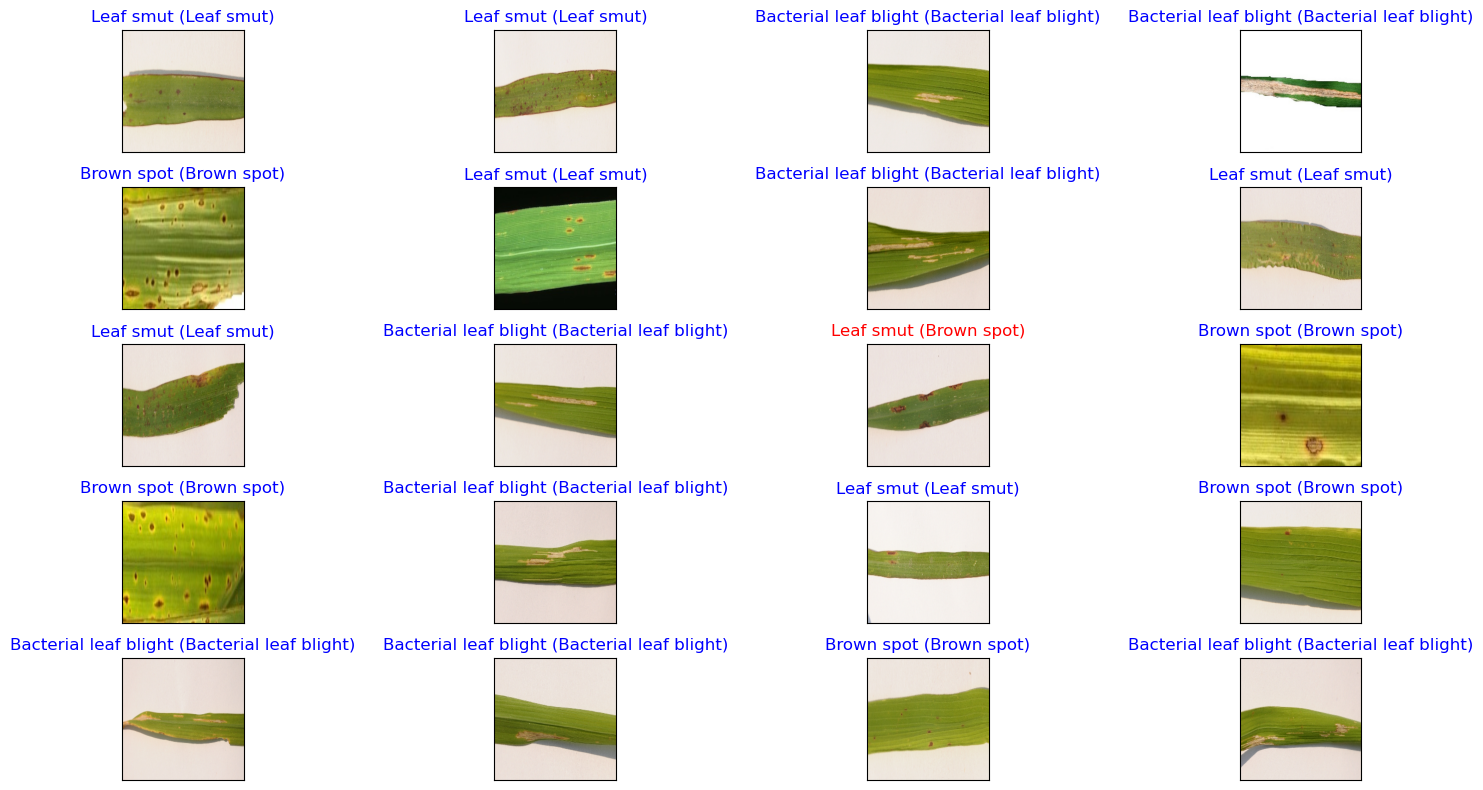

In [42]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=20, replace=False)):
    ax = fig.add_subplot(5, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))
    plt.tight_layout()

### Conclusion

We selected the best model as inception with augmentation,having 86 percentage of accuracy.From above prediction its clear that,this is best modelfor prediction.we got only one wrong prediction here,indicated in red font.

### Challenges Faced

* Image Data loading from directory
* Data Augmentation
* Transfer learning model implementation and error handling
* code for prediction